In [126]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reducción de dimensión no supervisada: Análisis de Componentes Principales (PCA)

PCA (Principal Component
Analysis) es un algoritmo de extracción de características. La diferencia principal es que en un
algoritmo de selección, se conservan las características originales y en uno de extracción, los datos
se transforman o proyectan en un nuevo espacio de características.

PCA ayuda a identificar patrones en los datos basado en la correlación entre las características;
es decir, intenta encontrar las direcciones de máxima varianza en datos con muchas dimensiones
y las proyecta en un nuevo subespacio con igual o menos dimensiones que el original. El algoritmo
se compone de los siguientes pasos:

--------------

**Algorithm 1.2** Principal Component Analysis

--------------

1. Estandarizar el conjunto de datos de dimensión $d$
2. Obtener la matriz de covarianza
3. Descomponer la matriz de covarianza en sus eigenvalores y eigenvectores
4. Ordenar los eigenvalores de manera decreciente junto con sus correspondientes eigenvectores
5. Seleccionar $k$ eigenvectores que corresponden con los $k$ mayores eigenvalores; $k$ es la dimensión de nuevo subespacio de características $(k<d)$
6. Construir una matriz de proyección $\mathbf{W}$ con los primeros $k$ eigenvectores
7. Transformar el conjunto de datos de entrada $\mathbf{X}$ de dimensión $d$ utilizando la matriz de proyección $\mathbf{W}$ para obtener el nuevo subespacio de características de dimensión $k$

In [127]:
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='petal_length', z='petal_width', color='species')
fig.show()

In [128]:
df_wine = pd.read_csv('https://bit.ly/3L1ZZI4', header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [129]:
df_wine.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


Separar datos

In [130]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Estandarizar

In [131]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Matriz de covarianza y eigenpares

In [132]:
cov_mat = np.cov(X_train_std.T) #
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvals = ', eigen_vals)

Eigenvals =  [4.88945036 2.5723867  1.42402417 1.01006333 0.73948335 0.63753663
 0.4885605  0.08519336 0.35340719 0.14893676 0.30651955 0.23999712
 0.21013203]


Gráfica con los aportes de cada eigenval

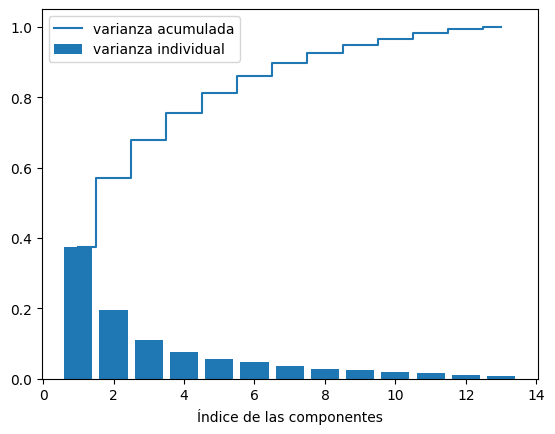

In [133]:
tot = sum(eigen_vals)
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,14), var_exp, label='varianza individual', align='center')
plt.step(range(1,14), cum_var_exp, label='varianza acumulada', where='mid')
plt.xlabel('Índice de las componentes')
plt.legend(loc='best')
plt.show()

Lista de eigenpares

In [134]:
eigen_par = [ ( np.abs(eigen_vals[i]), eigen_vecs[i]) for i in range(len(eigen_vecs)) ]
# ordenar de forma descendente
eigen_par.sort(key = lambda k:k[0], reverse=True)
eigen_par

[(np.float64(4.889450359282044),
  array([ 0.11172486,  0.5104629 ,  0.11030381,  0.0779785 ,  0.22298385,
         -0.19610257,  0.18209426, -0.03219582, -0.54606702,  0.15042801,
         -0.28903009,  0.32565335, -0.27553297])),
 (np.float64(2.57238670147979),
  array([-0.25389096,  0.18120169, -0.08771668,  0.47157252, -0.22377872,
         -0.66155787, -0.25269752,  0.00283575,  0.01254285, -0.03593319,
         -0.02573988, -0.08647194,  0.3338296 ])),
 (np.float64(1.4240241666762083),
  array([-0.00694753,  0.25203575, -0.68507766, -0.16528345,  0.15084772,
         -0.10497815,  0.23581803, -0.11560805,  0.32008276,  0.0418679 ,
          0.25556641,  0.39712304,  0.09900551])),
 (np.float64(1.0100633288849281),
  array([-0.23767174, -0.06606628, -0.59534202,  0.06551998, -0.161768  ,
          0.2354138 ,  0.19800386,  0.07287135, -0.48263431,  0.00807222,
         -0.16971822, -0.43872526,  0.00573807])),
 (np.float64(0.7394833450725108),
  array([ 0.12301836,  0.33158457, -0

In [135]:
#dos -60% de la varianza total
w=np.hstack((eigen_par[0][1][:,np.newaxis],
             eigen_par[1][1][:,np.newaxis]))
print('Matriz w: \n', w)


Matriz w: 
 [[ 0.11172486 -0.25389096]
 [ 0.5104629   0.18120169]
 [ 0.11030381 -0.08771668]
 [ 0.0779785   0.47157252]
 [ 0.22298385 -0.22377872]
 [-0.19610257 -0.66155787]
 [ 0.18209426 -0.25269752]
 [-0.03219582  0.00283575]
 [-0.54606702  0.01254285]
 [ 0.15042801 -0.03593319]
 [-0.28903009 -0.02573988]
 [ 0.32565335 -0.08647194]
 [-0.27553297  0.3338296 ]]


Transformar una muestra 1X13 a 1x2

In [136]:
print('Original: ',X_train_std[0])
print('Transformado: ',X_train_std[0].dot(w))

Original:  [-0.1636454   0.77483948  0.82979891  0.7088103   0.69350909 -1.0309496
 -1.4282443   1.8760349  -1.17842273  0.18191309 -0.34433763 -0.69478081
 -0.519376  ]
Transformado:  [1.24761718 1.21073424]


Transformacion de todos los datos

In [137]:
X_train_pca=X_train_std.dot(w)
X_train_std.shape,X_train_pca.shape

((124, 13), (124, 2))

Probando con una regresion logistica

In [138]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='auto',solver='liblinear')
lr.fit(X_train_pca,y_train)

C:\Users\denis\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



LogisticRegression(multi_class='auto', solver='liblinear')

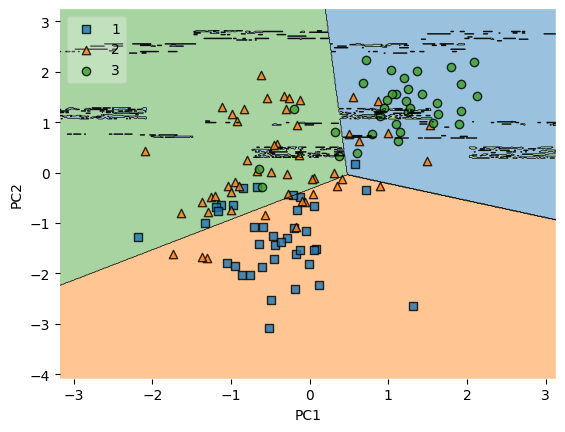

In [139]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_pca,y_train,legend=2,clf=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
# esta mal y toca ver porque

### PCA de sklearn

Datos

In [140]:
df_wine = pd.read_csv('https://bit.ly/3L1ZZI4',header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [141]:
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.3)

Estandarizando

In [142]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Modelos

In [143]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# inicializar PCA y el modelo de RL
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='auto', solver = 'liblinear')

Ajustar y transformar los datos

In [144]:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca,y_train)

C:\Users\denis\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



LogisticRegression(multi_class='auto', solver='liblinear')

Graficar el conjunto de entrenamiento

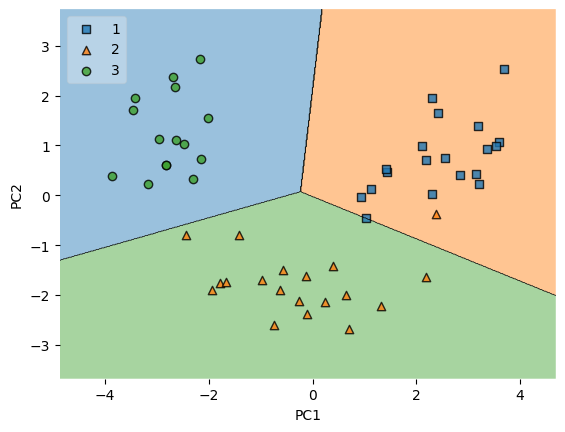

In [145]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_pca,y_train,legend=2,clf=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Graficar el conjunto de pruebas

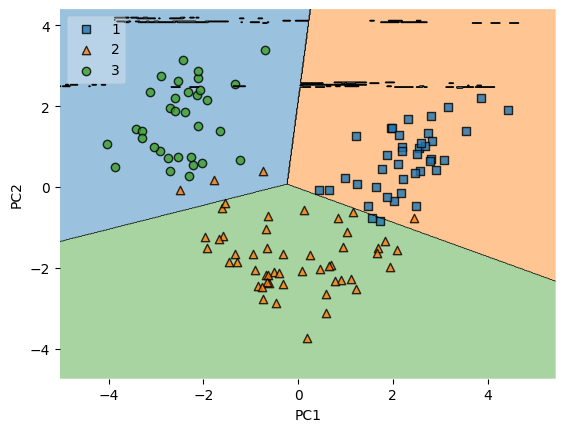

In [146]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test_pca,y_test,legend=2,clf=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Reducción de dimensión supervisada: Análisis Lineal Discriminante (LDA)

Linear Discriminant Analysis (LDA) es una técnica de extracción de características
que puede usarse para incrementar la eficiencia computacional y reducir los sobreajustes. Formulado inicialmente por Ronald A. Fischer en 1936 con el conjunto de
datos de flores iris para problemas de clasificación de dos clases. En 1948 C. Radhakrishna Rao
lo generalizó para problemas multiclase bajo el supuesto de covarianzas
de clase iguales y clases con distribuciones normales.

En general, los conceptos detrás de LDA son muy similares a PCA: mientras PCA busca las
componentes ortogonales de varianza mínima, el objetivo de LDA es encontrar un subespacio de
características que optimice la separabilidad de clases.
El algoritmo se compone de los siguientes pasos:

--------------

**Algorithm 1.3** Linear Discriminant Analysis

--------------

1. Estandarizar el conjunto de datos de dimensión $d$
2. Para cada clase, calcular su vector de medias (de dimensión $d$)
3. Obtener la matriz de dispersión (*scatter matrix*) entre las clases $S_B$ y la matriz de dispersión de la propia clase $S_W$
4. Determinar los eigenvalores y eigenvectores correspondientes a la matriz $S_W^{-1}S_B$
5. Ordenar los eigenvalores de manera decreciente con sus correspondientes eigenvectores
6. Seleccionar los $k$ eigenvectores que corresponden con los $k$ mayores eigenvalores para contruir una $d \times k$-dimensional matriz de proyección $\mathbf{W}$; los eigenvectores son las columnas de dicha matriz
7. Proyectar las muestras sobre el nuevo subespacio de características utilizando la matriz de proyección $\mathbf{W}$

### LDA de sklearn

In [147]:
# Si tus datos son etiquetados es mejor usar LDA
X,y = df_wine.iloc[:,1:].values,df_wine.iloc[:,0].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

Estandarizando

In [148]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Revisar con regresión logística

Modelos

In [149]:
# matriz de dispersion (cada fila de la matriz por la misma matriz)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
lda = LDA(n_components=2)
lr = LogisticRegression()

Ajustar y transformar los datos

In [150]:
X_train_lda = lda.fit_transform(X_train_std,y_train)
X_test_lda = lda.transform(X_test_std)
lr.fit(X_train_lda,y_train)

LogisticRegression()

Grafica del conjunto de entrenamiento

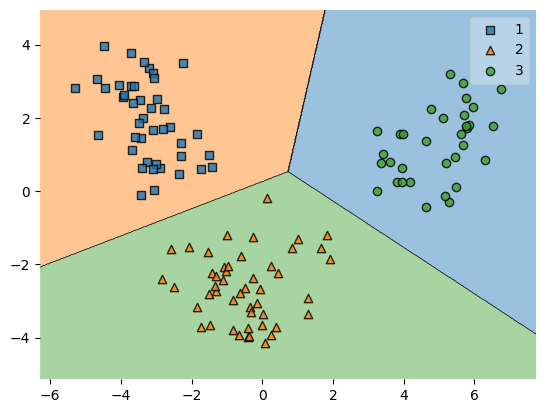

In [151]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train_lda,y_train,clf=lr)
plt.show()

Grafica del conjunto de pruebas

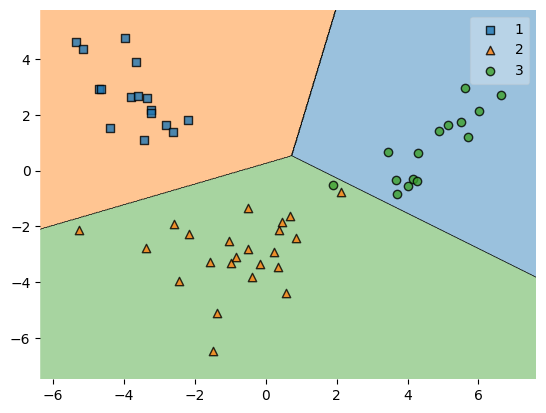

In [152]:
plot_decision_regions(X_test_lda,y_test,clf=lr)
plt.show()